This notebook presents an analysis of the survey data, focusing on key questions such as:

1. What is the overall sentiment towards Muslims as of June 2024? The responses are categorized into three options: good, neutral, and bad.

2. How do different religious groups (e.g., Christians, Muslims, Buddhists) perceive Muslims?

3. How does knowing a Muslim influence one's feelings towards them?

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
survey= pd.read_csv("brand_sentiment001.csv")

In [212]:
survey= survey.iloc[1:]

In [213]:
survey.columns

Index(['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'What religious affiliation are you?',
       'Unnamed: 11',
       'How many muslim people have you talked to / with in the last 7 days ?',
       'How do you feel about Muslims people in America',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [214]:
survey.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,What is your level of education?,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,Gender,Age,Major US Region,Device,Household Income
1,1.186364e+11,456809113.0,06/28/2024 12:14:33 AM,06/28/2024 12:14:55 AM,NaN,NaN,NaN,NaN,42e364854ee0d88ae7a54414fc,smc,...,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
2,1.186364e+11,456809113.0,06/28/2024 12:13:39 AM,06/28/2024 12:14:45 AM,NaN,NaN,NaN,NaN,394e663d557cf20dbe029ccb11,smc,...,Graduate school,Facebook,NaN,Very comfortable,Often,male,18_to_29,pacific,android_mobile,175000_to_199999
3,1.186364e+11,456809113.0,06/28/2024 12:14:13 AM,06/28/2024 12:14:32 AM,NaN,NaN,NaN,NaN,7979a63e44103174c29f1e9013,smc,...,High school or less,Facebook,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
4,1.186364e+11,456809113.0,06/28/2024 12:13:51 AM,06/28/2024 12:14:32 AM,NaN,NaN,NaN,NaN,7654f47158c3b05844841ae495,smc,...,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,pacific,android_mobile,175000_to_199999
5,1.186364e+11,456809113.0,06/28/2024 12:12:50 AM,06/28/2024 12:13:14 AM,NaN,NaN,NaN,NaN,85cfb2e16978687e3ae4669696,smc,...,High school or less,Facebook,NaN,Very comfortable,Often,male,18_to_29,NaN,android_mobile,50000_to_74999


In [193]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 1 to 109
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Respondent ID                                                            109 non-null    float64
 1   Collector ID                                                             109 non-null    float64
 2   Start Date                                                               109 non-null    object 
 3   End Date                                                                 109 non-null    object 
 4   IP Address                                                               0 non-null      float64
 5   Email Address                                                            0 non-null      float64
 6   First Name                                                               0

In [194]:
# remove columns with all null values
survey= survey.drop(['Email Address', 'First Name','Last Name','IP Address'], axis=1)

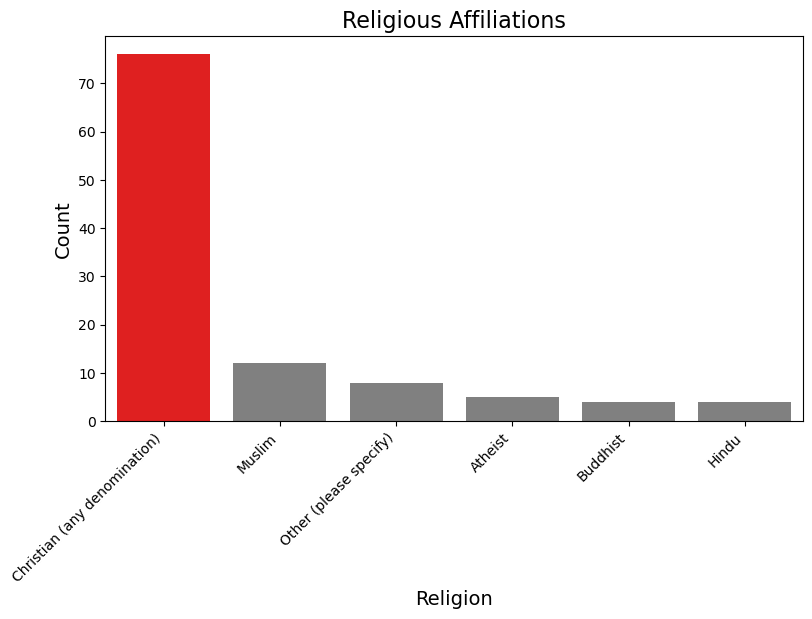

In [195]:
# Calculate the counts of each religious affiliation
religion_counts = survey['What religious affiliation are you?'].value_counts().reset_index()
religion_counts.columns = ['Religion', 'Count']

# Determine the index of the largest bar
max_index = religion_counts['Count'].idxmax()

# Create a color list with grey for all bars except the largest one
colors = ['grey' if i != max_index else 'red' for i in range(len(religion_counts))]

# Create a bar plot with custom colors
plt.figure(figsize=(9, 5))
sns.barplot(x='Religion', y='Count', data=religion_counts, palette=colors)

# Add title and labels
plt.title('Religious Affiliations', fontsize=16)
plt.xlabel('Religion', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


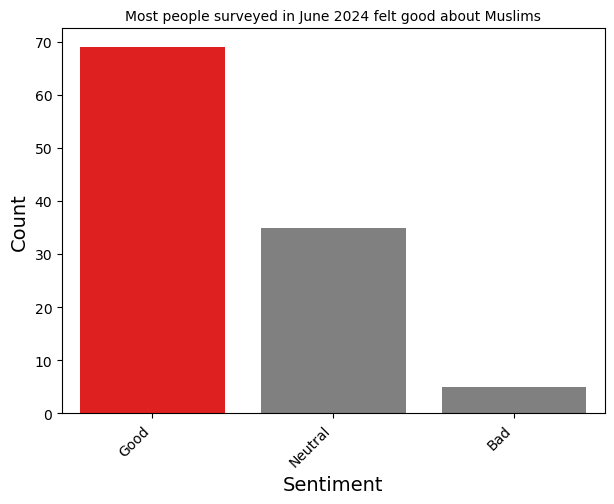

In [196]:
# Calculate the counts of each religious affiliation
sentiment_counts = survey['How do you feel about Muslims people in America'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Determine the index of the largest bar
max_index = sentiment_counts['Count'].idxmax()

# Create a color list with grey for all bars except the largest one
colors = ['grey' if i != max_index else 'red' for i in range(len(sentiment_counts))]

# Create a bar plot with custom colors
plt.figure(figsize=(7, 5))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette=colors)

# Add title and labels
plt.title('Most people surveyed in June 2024 felt good about Muslims', fontsize=10)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [197]:
# Group by religious affiliation and the categorical views
grouped = survey.groupby(['What religious affiliation are you?', \
                      'How do you feel about Muslims people in America']).size().unstack()
sentiment_religion= grouped[['Good','Bad','Neutral']]
# Fill any missing values with 0
sentiment_religion=sentiment_religion.fillna(0)

In [198]:
sentiment_religion

How do you feel about Muslims people in America,Good,Bad,Neutral
What religious affiliation are you?,,,
Atheist,3.0,0.0,2.0
Buddhist,2.0,0.0,2.0
Christian (any denomination),51.0,2.0,23.0
Hindu,1.0,1.0,2.0
Muslim,10.0,1.0,1.0
Other (please specify),2.0,1.0,5.0


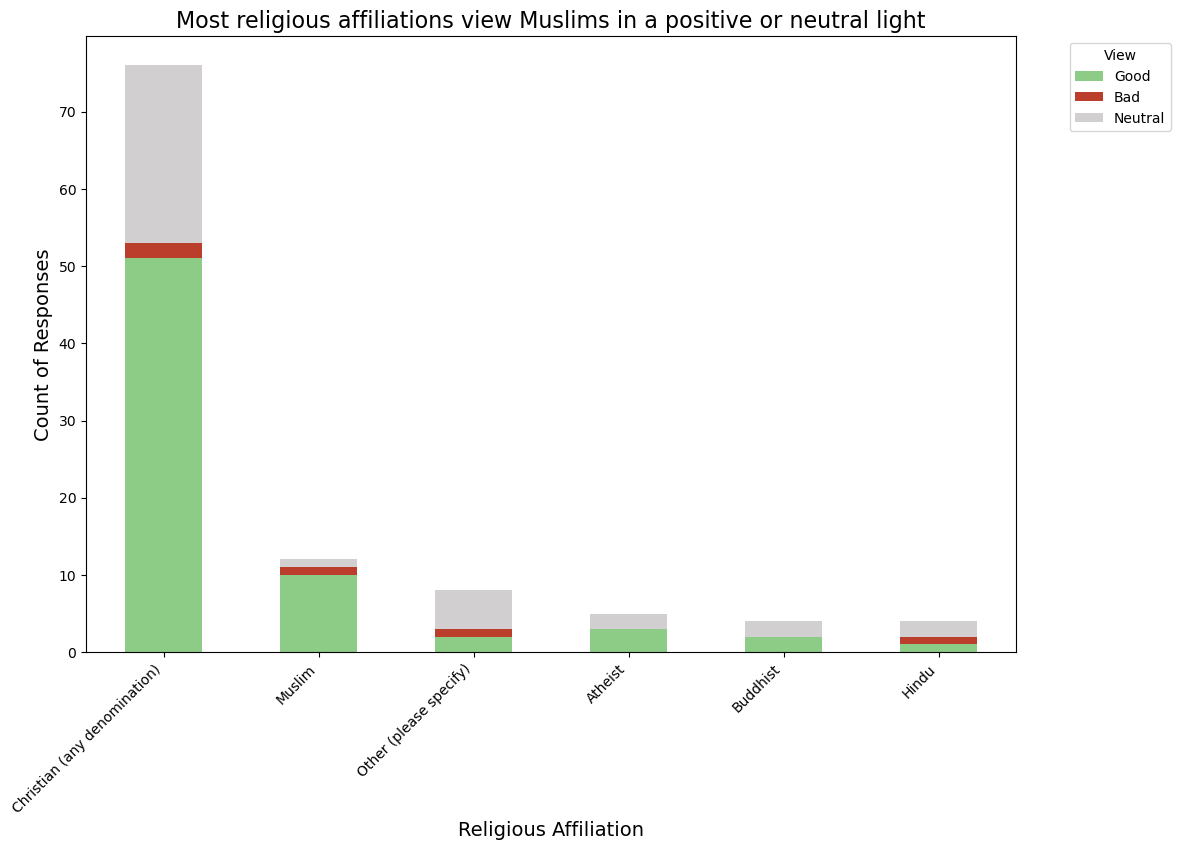

In [199]:
# Step 1: Calculate the total for each religious affiliation
sentiment_religion['Total'] = sentiment_religion.sum(axis=1)

# Step 2: Sort the DataFrame by the Total column in descending order
sentiment_religion_sorted = sentiment_religion.sort_values(by='Total', ascending=False)

# Step 3: Drop the 'Total' column as it's no longer needed for plotting
sentiment_religion_sorted = sentiment_religion_sorted.drop(columns=['Total'])

# Step 4: Plot the stacked bar chart
ax = sentiment_religion_sorted.plot(kind='bar', stacked=True, figsize=(12, 8),\
                                    color= ['#8ccc87','#ba3e2b','#d1cfcf'])

# Add title and labels
plt.title('Most religious affiliations view Muslims in a positive or neutral light', fontsize=16)
plt.xlabel('Religious Affiliation', fontsize=14)
plt.ylabel('Count of Responses', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='View', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [200]:
other_affiliations = survey[survey['What religious affiliation are you?']=='Other (please specify)']['Unnamed: 11']
other_affiliations= other_affiliations.value_counts()

In [201]:
other_affiliations

Agnostic        1
None            1
R               1
Mormon          1
ok              1
Wiccan/Pagan    1
Inclusionist    1
Agnostic        1
Name: Unnamed: 11, dtype: int64

In [202]:
survey.head()

,Respondent ID,Collector ID,Start Date,End Date,Custom Data 1,collector_type_source,What religious affiliation are you?,Unnamed: 11,How many muslim people have you talked to / with in the last 7 days ?,How do you feel about Muslims people in America,What is your level of education?,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,Gender,Age,Major US Region,Device,Household Income
1,1.186364e+11,456809113.0,06/28/2024 12:14:33 AM,06/28/2024 12:14:55 AM,42e364854ee0d88ae7a54414fc,smc,Muslim,NaN,More than 10,Good,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
2,1.186364e+11,456809113.0,06/28/2024 12:13:39 AM,06/28/2024 12:14:45 AM,394e663d557cf20dbe029ccb11,smc,Christian (any denomination),NaN,More than 10,Bad,Graduate school,Facebook,NaN,Very comfortable,Often,male,18_to_29,pacific,android_mobile,175000_to_199999
3,1.186364e+11,456809113.0,06/28/2024 12:14:13 AM,06/28/2024 12:14:32 AM,7979a63e44103174c29f1e9013,smc,Muslim,NaN,5 to 10,Good,High school or less,Facebook,NaN,Comfortable,Often,male,30_to_44,middle_atlantic,android_mobile,150000_to_174999
4,1.186364e+11,456809113.0,06/28/2024 12:13:51 AM,06/28/2024 12:14:32 AM,7654f47158c3b05844841ae495,smc,Christian (any denomination),NaN,More than 10,Good,Graduate school,Twitter,NaN,Comfortable,Often,male,30_to_44,pacific,android_mobile,175000_to_199999
5,1.186364e+11,456809113.0,06/28/2024 12:12:50 AM,06/28/2024 12:13:14 AM,85cfb2e16978687e3ae4669696,smc,Muslim,NaN,5 to 10,Good,High school or less,Facebook,NaN,Very comfortable,Often,male,18_to_29,NaN,android_mobile,50000_to_74999


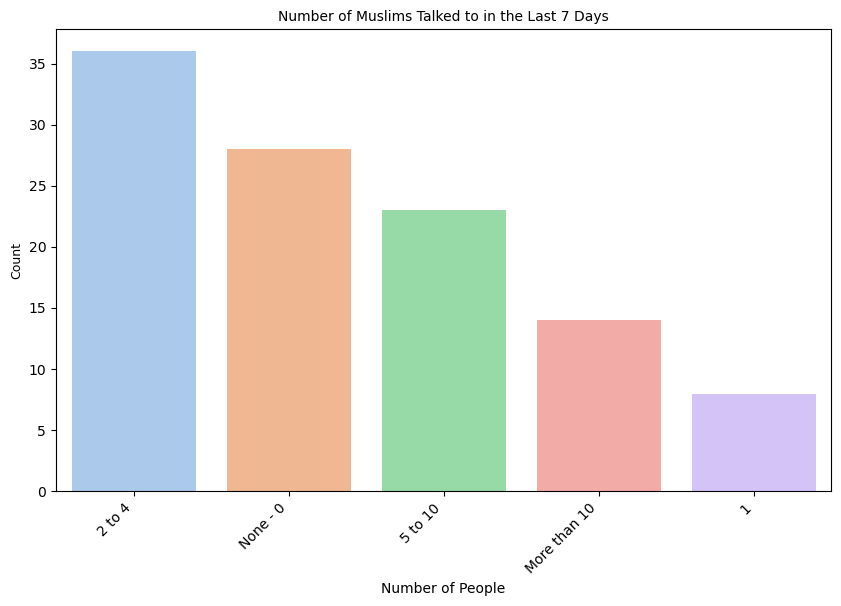

In [203]:
survey_cleaned = survey['How many muslim people have you talked to / with in the last 7 days ?'].dropna()

# Plot the bar chart
plt.figure(figsize=(10, 6))

order = survey_cleaned.value_counts().index

sns.countplot(x=survey_cleaned,order=order, palette='pastel')

# Add title and labels
plt.title('Number of Muslims Talked to in the Last 7 Days', fontsize=10)
plt.xlabel('Number of People', fontsize=10)
plt.ylabel('Count', fontsize=9)

# Rotate x labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# How does recent interaction with a Muslim affect one's perception/feeling

In [204]:
view_talked = survey.groupby(['How many muslim people have you talked to / with in the last 7 days ?',
                               'How do you feel about Muslims people in America']).size().reset_index(name='Count')

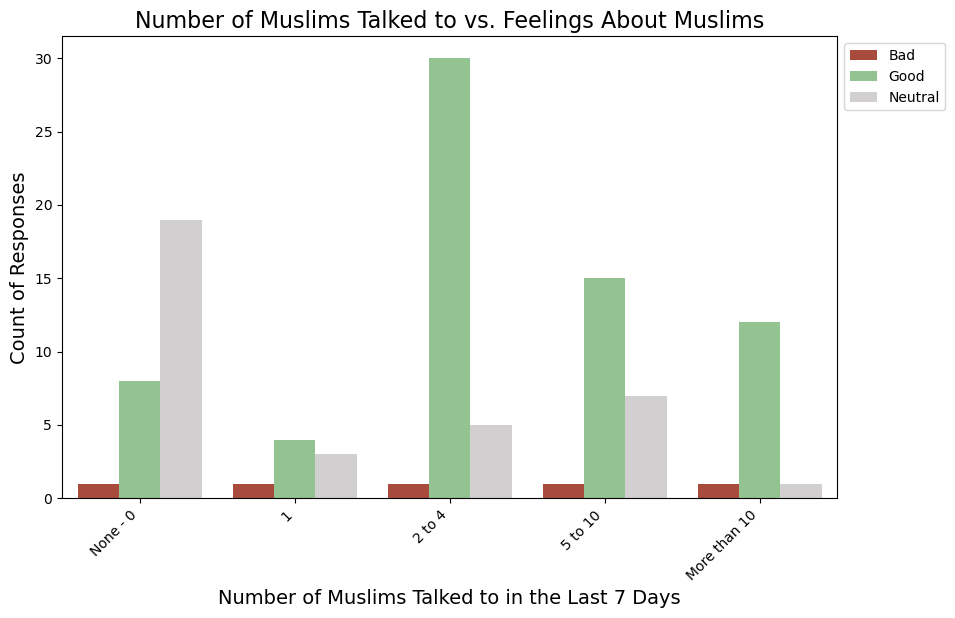

In [205]:
 plt.figure(figsize=(10, 6))

custom_palette = {'Bad':'#ba3e2b', 'Good':'#8ccc87', 'Neutral': '#d1cfcf'}
category_order = ['None - 0', '1', '2 to 4', '5 to 10', 'More than 10']

# Create the bar plot
ax = sns.barplot(x='How many muslim people have you talked to / with in the last 7 days ?', 
                 y='Count', hue='How do you feel about Muslims people in America', 
                 data=view_talked, palette=custom_palette, order=category_order)

# Add title and labels
plt.title('Number of Muslims Talked to vs. Feelings About Muslims', fontsize=16)
plt.xlabel('Number of Muslims Talked to in the Last 7 Days', fontsize=14)
plt.ylabel('Count of Responses', fontsize=14)

# Rotate x labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Customize the legend
legend = ax.legend(title='', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('')  # Ensure the title is removed

# Show the plot
plt.show()


In [206]:
view_news = survey.groupby(['Where do you get your news from?',
                               'How do you feel about Muslims people in America']).size().reset_index(name='Count')

In [207]:
view_news

,Where do you get your news from?,How do you feel about Muslims people in America,Count
0,CNN,Bad,1
1,CNN,Good,11
2,CNN,Neutral,8
3,FOX News,Bad,1
4,FOX News,Good,5
5,FOX News,Neutral,7
6,Facebook,Bad,2
7,Facebook,Good,25
8,Facebook,Neutral,5
9,NPR,Good,4


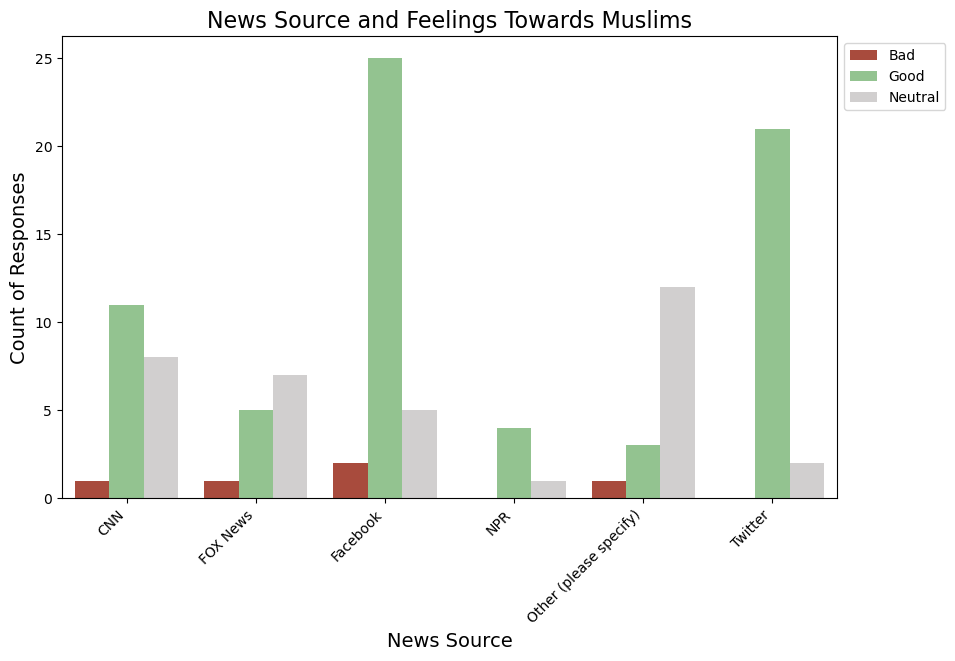

In [208]:
# Define the custom color palette
custom_palette= {'Bad':'#ba3e2b', 'Good':'#8ccc87', 'Neutral': '#d1cfcf'}

plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x= 'Where do you get your news from?', 
                 y='Count', hue='How do you feel about Muslims people in America', 
                 data=view_news, palette= custom_palette)

# Add title and labels
plt.title('News Source and Feelings Towards Muslims', fontsize=16)
plt.xlabel('News Source', fontsize=14)
plt.ylabel('Count of Responses', fontsize=14)

# Rotate x labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Customize the legend
legend = ax.legend(title='', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('')  # Ensure the title is removed

# Show the plot
plt.show()


In [209]:
survey[['Unnamed: 16','How do you feel about Muslims people in America']].dropna()

,Unnamed: 16,How do you feel about Muslims people in America
8,apple and yahoo news,Neutral
15,I don’t watch any news,Neutral
21,Local news,Neutral
42,Tik tok,Neutral
62,Hi,Neutral
63,cbs local news-morning,Neutral
72,"Local news, national television affiliates",Neutral
73,Multiple sources,Neutral
80,YouTube,Bad
82,"radio, news webpages",Neutral
